In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from pygam import LinearGAM, s

## Data cleaning

### Create separate columns for the rates of mental health conditions and suicide for each gender.

In [3]:
DATASET_FILENAME = "intermediate_suicide_2021.csv" # name of the csv file containing the dataset

In [4]:
suicide_data = pd.read_csv(DATASET_FILENAME)
suicide_data.head()

,location,sex,age,anxiety_percent,bipolar_percent,depress_percent,suicide_rate_per100k,country_code,year,gdp_usd
0,People's Republic of China,Male,15-49 years,0.030089,0.002371,0.025406,7.148372,CHN,2021.0,12617.505104
1,People's Republic of China,Female,15-49 years,0.049990,0.002573,0.041064,4.274235,CHN,2021.0,12617.505104
2,Democratic People's Republic of Korea,Male,15-49 years,0.031223,0.002446,0.023614,10.637906,PRK,2021.0,NaN
3,Democratic People's Republic of Korea,Female,15-49 years,0.052123,0.002546,0.040503,7.770534,PRK,2021.0,NaN
4,Socialist Republic of Viet Nam,Male,15-49 years,0.022690,0.004234,0.026537,11.649648,VNM,2021.0,3704.193559


In [5]:
pivoted = suicide_data.pivot_table(
    index=['location', 'age', 'country_code', 'gdp_usd'], # use these as rows in a MultiIndex
    columns='sex', # maks separate disorder and suicide columns by sex
    values=['anxiety_percent', 'bipolar_percent', 'depress_percent', 'suicide_rate_per100k'] # cols to aggregate
)

pivoted.head() # Results in a table with a MultiIndex for both the index and columns

anxiety_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.064493   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.086864   
Argentine Republic  15-49 years ARG          10738.017922        0.111099   
Australia           15-49 years AUS          60607.778861        0.109350   
Barbados            15-49 years BRB          18696.785895        0.089775   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.039367   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.049242   
Argentine Republic  15-49 years ARG          10738.017922  0.057252   
Australia           15-49 years AUS          60607.778861  0.068449   
Barbados            15-49 years BRB          18696.785895  0.051127   

                                                          bipolar_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.003532   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.013375   
Argentine Republic  15-49 years ARG          10738.017922        0.011635   
Australia           15-49 years AUS          60607.778861        0.016182   
Barbados            15-49 years BRB          18696.785895        0.013237   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.003448   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.011714   
Argentine Republic  15-49 years ARG          10738.017922  0.009242   
Australia           15-49 years AUS          60607.778861  0.015370   
Barbados            15-49 years BRB          18696.785895  0.011617   

                                                          depress_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.040142   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.057791   
Argentine Republic  15-49 years ARG          10738.017922        0.055580   
Australia           15-49 years AUS          60607.778861        0.087065   
Barbados            15-49 years BRB          18696.785895        0.060730   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.030680   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.030021   
Argentine Republic  15-49 years ARG          10738.017922  0.036287   
Australia           15-49 years AUS          60607.778861  0.059841   
Barbados            15-49 years BRB          18696.785895  0.035615   

                                                          suicide_rate_per100k  \
sex                                                                     Female   
location            age         country_code gdp_usd                             
American Samoa      15-49 years ASM          15236.160488             5.571612   
Antigua and Barbuda 15-49 years ATG          17340.379069             0.251559   
Argentine Republic  15-49 years ARG          10738.017922             4.953540   
Australi

In [6]:
pivoted = pivoted.reset_index() # Turn the MultiIndex in the rows into a single index
pivoted.head()

location          age country_code       gdp_usd  \
sex                                                                
0         American Samoa  15-49 years          ASM  15236.160488   
1    Antigua and Barbuda  15-49 years          ATG  17340.379069   
2     Argentine Republic  15-49 years          ARG  10738.017922   
3              Australia  15-49 years          AUS  60607.778861   
4               Barbados  15-49 years          BRB  18696.785895   

    anxiety_percent           bipolar_percent           depress_percent  \
sex          Female      Male          Female      Male          Female   
0          0.064493  0.039367        0.003532  0.003448        0.040142   
1          0.086864  0.049242        0.013375  0.011714        0.057791   
2          0.111099  0.057252        0.011635  0.009242        0.055580   
3          0.109350  0.068449        0.016182  0.015370        0.087065   
4          0.089775  0.051127        0.013237  0.011617        0.060730   

              suicide_rate_per100k             
sex      Male               Female       Male  
0    0.030680             5.571612  19.082456  
1    0.030021             0.251559   2.028625  
2    0.036287             4.953540  21.255442  
3    0.059841             7.524478  25.598084  
4    0.035615             1.165735   6.877231

In [7]:
# Flatten the MultiIndex columns into a single index
pivoted.columns = ['_'.join(col) for col in pivoted.columns.values]

In [8]:
# Clean up column names to be snake case and have no trailing underscores
pivoted.columns = [col.lower().strip("_") for col in pivoted.columns]
pivoted.head()

,location,age,country_code,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [9]:
# Set the index to a MultiIndex whose levels are the country name and country code

pivoted = pivoted.set_index(["location", "country_code"]) # Set the index to the country name
pivoted = pivoted.drop(columns=["age"]) # drop age column
pivoted.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
Antigua and Barbuda,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
Argentine Republic,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
Australia,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
Barbados,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [10]:
pivoted.isna().sum()

gdp_usd                        0
anxiety_percent_female         0
anxiety_percent_male           0
bipolar_percent_female         0
bipolar_percent_male           0
depress_percent_female         0
depress_percent_male           0
suicide_rate_per100k_female    0
suicide_rate_per100k_male      0
dtype: int64

There is no missing data.

### Split by gender

Now, we will make separate DataFrames containing the mental health disorder rates and suicide rates for men and women, respectively. Both DataFrames will have GDP.

In [11]:
male_cols = [col for col in pivoted.columns if not col.endswith("_female")] # All the columns we will have in the dataset for men (GDP and prevalences for men)
female_cols = [col for col in pivoted.columns if not col.endswith("_male")] # All the columns we will have in the dataset for women (GDP and prevalences for women)

male_df = pivoted[male_cols] # Dataset with male suicide rates and statistics
female_df = pivoted[female_cols] # Dataset with female suicide rates and statistics

In [12]:
male_df.head() 

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male,suicide_rate_per100k_male
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.039367,0.003448,0.030680,19.082456
Antigua and Barbuda,ATG,17340.379069,0.049242,0.011714,0.030021,2.028625
Argentine Republic,ARG,10738.017922,0.057252,0.009242,0.036287,21.255442
Australia,AUS,60607.778861,0.068449,0.015370,0.059841,25.598084
Barbados,BRB,18696.785895,0.051127,0.011617,0.035615,6.877231


In [13]:
female_df.head()

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female,suicide_rate_per100k_female
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.064493,0.003532,0.040142,5.571612
Antigua and Barbuda,ATG,17340.379069,0.086864,0.013375,0.057791,0.251559
Argentine Republic,ARG,10738.017922,0.111099,0.011635,0.055580,4.953540
Australia,AUS,60607.778861,0.109350,0.016182,0.087065,7.524478
Barbados,BRB,18696.785895,0.089775,0.013237,0.060730,1.165735


## Scale the data for PCA

For supervised learning, we must first do a train/test split and then scaling. For PCA, there is no train/test split, and the entire dataset needs to be scaled. We perform that scaling below, for both the male dataset and the female one.

In [179]:
male_scaler_pca = StandardScaler()
male_data_scaled_pca = pd.DataFrame(male_scaler_pca.fit_transform(male_df), columns = male_df.columns, index = male_df.index)

female_scaler_pca = StandardScaler()
female_data_scaled_pca = pd.DataFrame(female_scaler_pca.fit_transform(female_df), columns = female_df.columns, index = female_df.index)

In [180]:
male_data_scaled_pca.head()

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male,suicide_rate_per100k_male
location,country_code,,,,,
American Samoa,ASM,-0.092538,-0.671467,-1.575137,-1.131721,0.126325
Antigua and Barbuda,ATG,-0.016200,0.174987,1.314183,-1.186341,-1.076415
Argentine Republic,ARG,-0.255723,0.861572,0.450211,-0.667252,0.279577
Australia,AUS,1.553472,1.821261,2.592254,1.284051,0.585847
Barbados,BRB,0.033008,0.336544,1.280517,-0.722895,-0.734462


In [181]:
female_data_scaled_pca.head()

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female,suicide_rate_per100k_female
location,country_code,,,,,
American Samoa,ASM,-0.092538,-0.549566,-1.467871,-1.431164,0.218146
Antigua and Barbuda,ATG,-0.016200,0.354850,1.198311,-0.479321,-1.051381
Argentine Republic,ARG,-0.255723,1.334631,0.726859,-0.598568,0.070655
Australia,AUS,1.553472,1.263914,1.958586,1.099414,0.684160
Barbados,BRB,0.033008,0.472529,1.160782,-0.320828,-0.833231


## EDA

### Helper functions

We will define two helper functions for EDA, one that plots a heatmap of the correlation matrix, and one that makes a pairplot of a dataset.

In [14]:
def plot_heatmap(df: pd.DataFrame, figsize: tuple[int] = (10,8), title: str = "Correlation Matrix for Suicide Data"):
    """
    Plots the heatmap of the correlation matrix of a dataset.
    Parameters
        - df: the dataframe to plot
        - figsize: a tuple of integers for the figure size
        - title: title of the plot
    """
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(), annot=True, cmap="viridis")
    plt.title(title, fontsize=20)
    plt.show()

In [15]:
def make_pairplot(df: pd.DataFrame, figsize: tuple[int] = (12,12), title: str = "Pairplot for Suicide Data"):
    """ 
    Make a pairplot of a dataset 
    Params:
        - df: the dataframe to plot
        - figsize: a tuple of integers for the figure size
        - title: title of the plot
    """
    grid = sns.PairGrid(df, corner=True)
    grid.map_lower(sns.scatterplot, alpha=0.6)
    grid.map_diag(sns.histplot)
    grid.figure.set_size_inches(figsize)
    grid.figure.suptitle(title)

### Male dataset

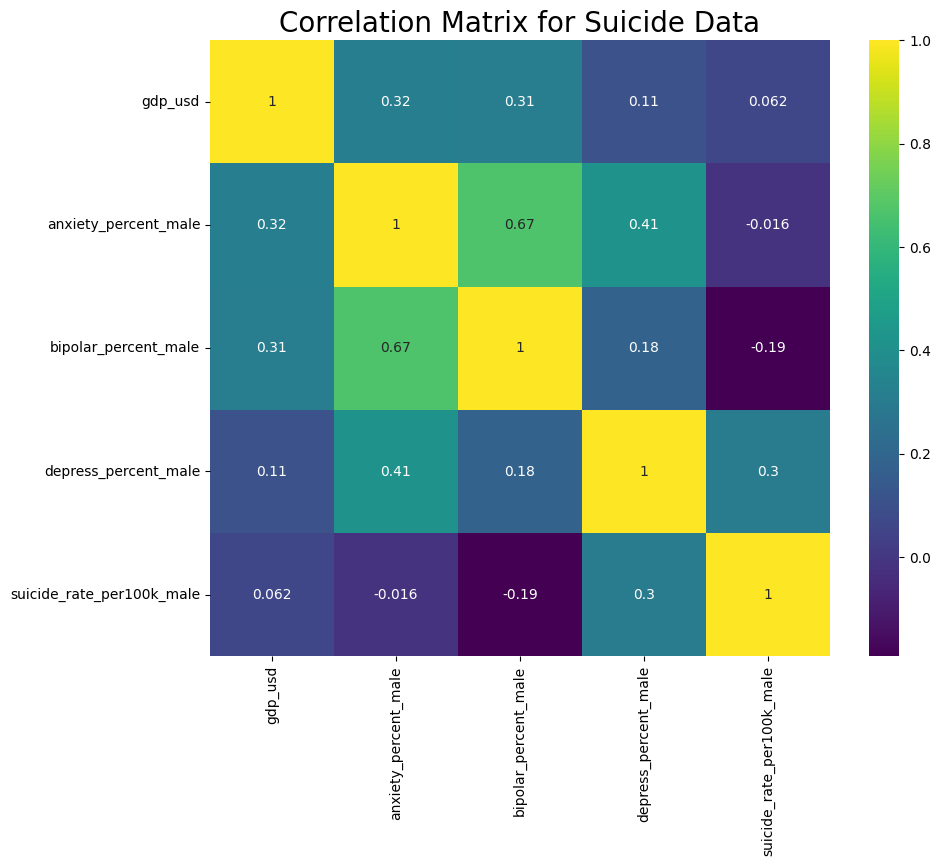

In [16]:
plot_heatmap(male_df)

[Interpretation here]

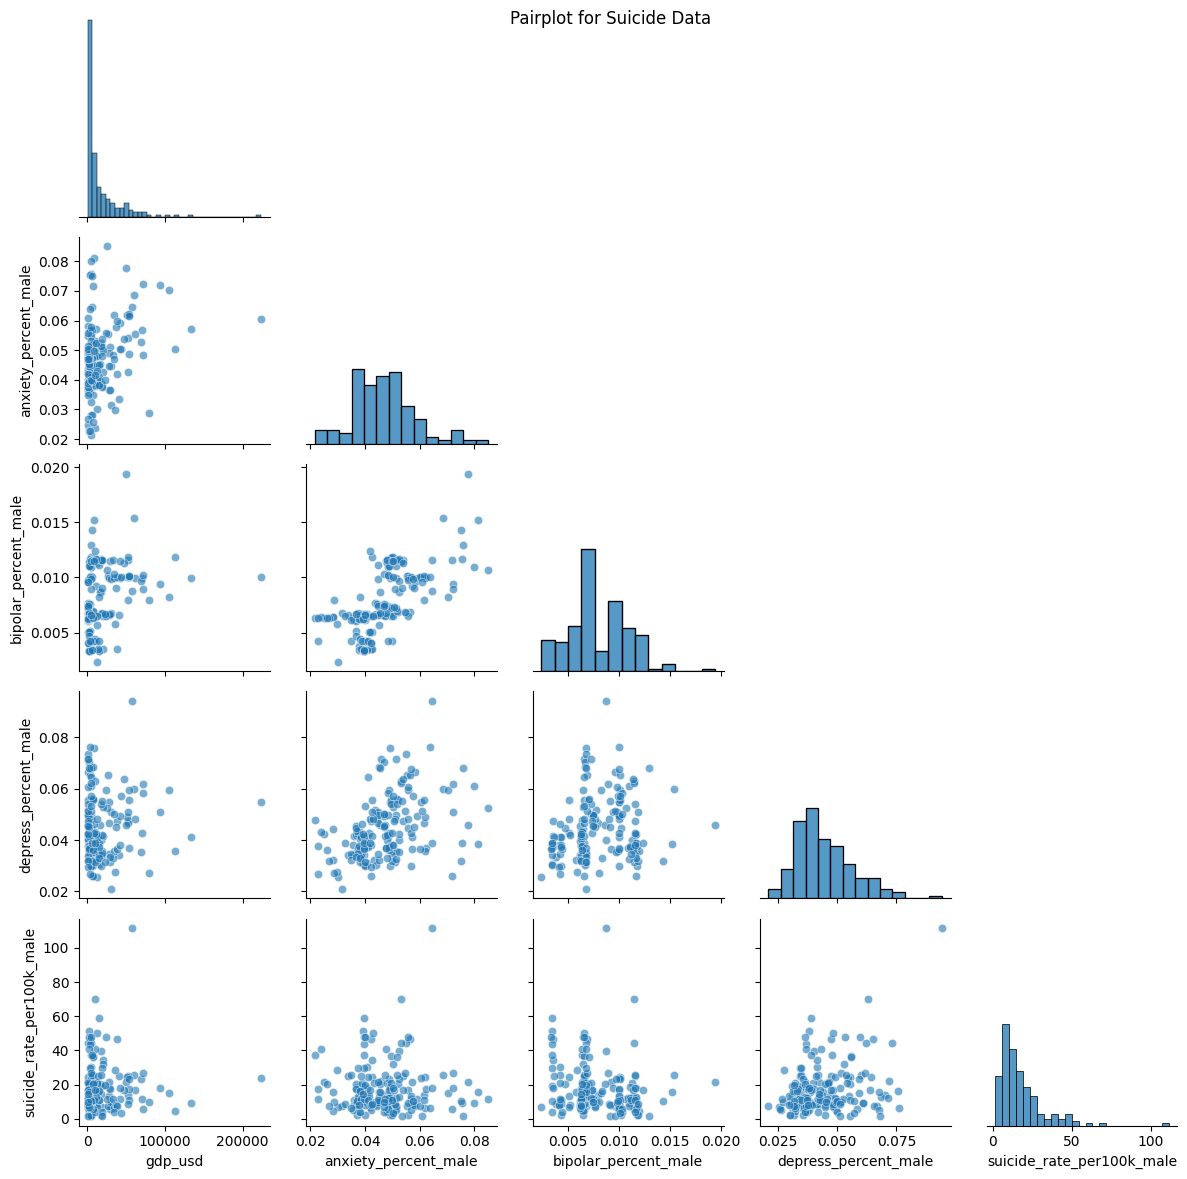

In [17]:
make_pairplot(male_df)

We see a nonlinear relationship between all the predictors and the response. So, we will use spline terms in the GAM.

### Female dataset

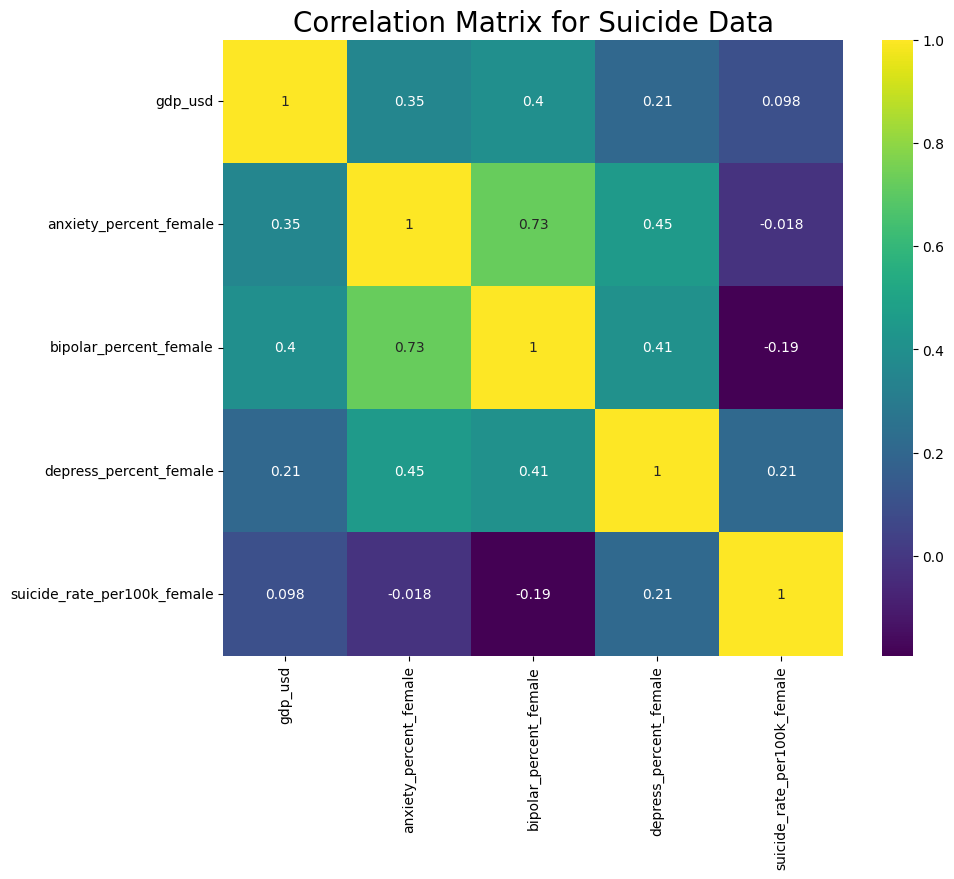

In [18]:
plot_heatmap(female_df)

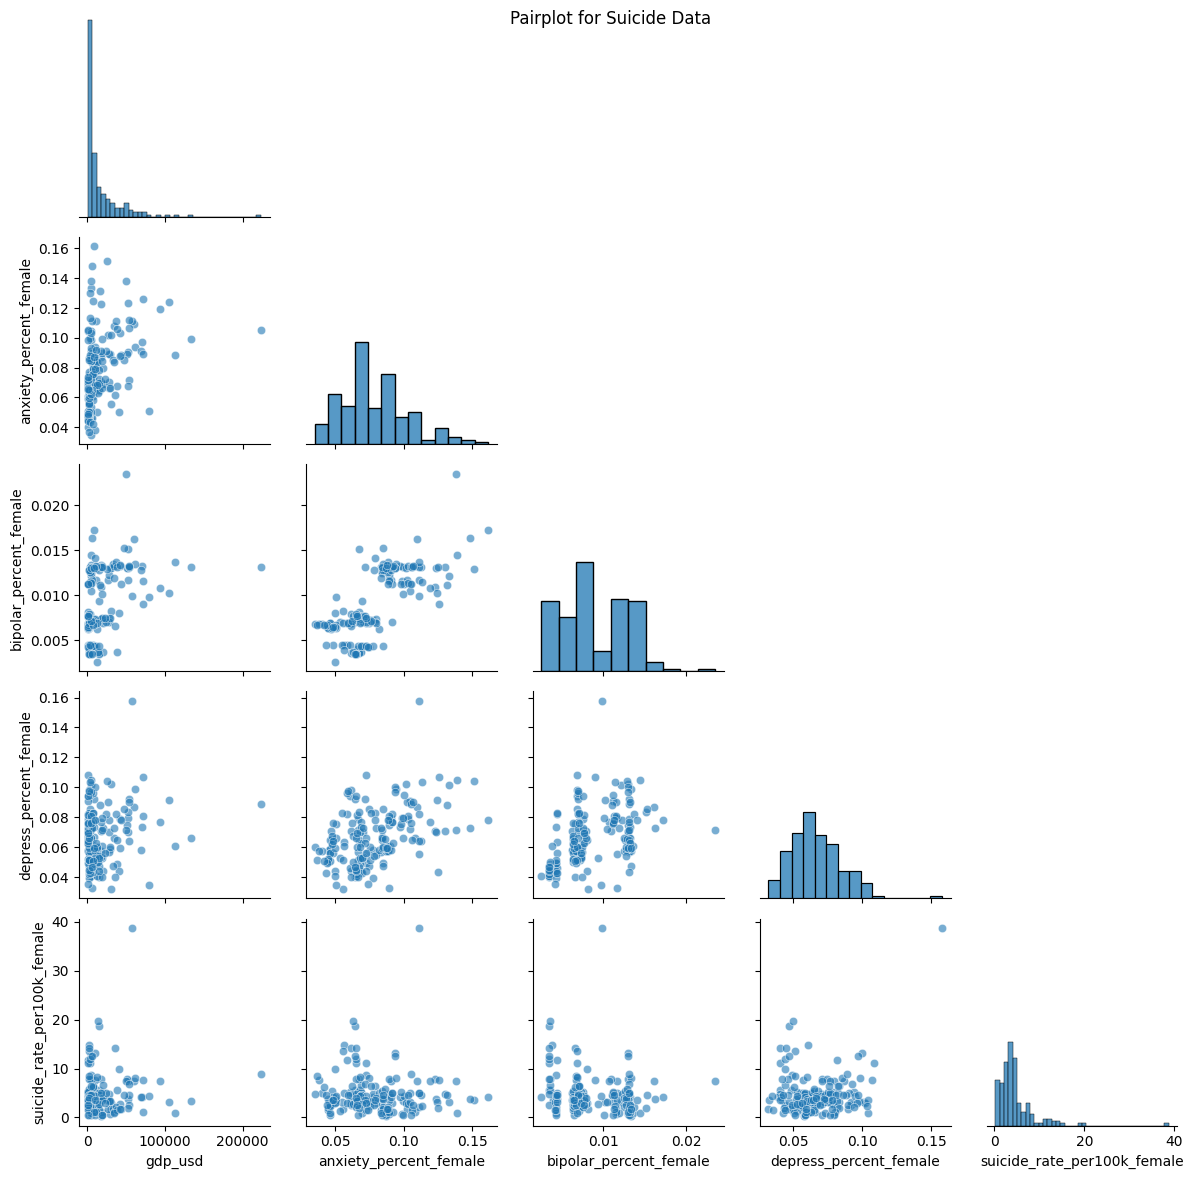

In [19]:
make_pairplot(female_df)

Again, we see a nonlinear relationship between all the predictors and the response. So, we will use spline terms in the GAM.

## Train/test split and scaling for supervised learning

### Train/test split

We will split the data into a training and test set by generating random indices for each set.

In [20]:
all_indices = np.arange(len(female_df)) # integer index from 0 to the number of samples
train_indices = np.random.choice(all_indices, size=int(0.8 * len(all_indices)), replace=False) # indices of the training set
test_indices = list( set(all_indices) - set(train_indices) ) # Get the indices of the test set by taking all the indices that are NOT in the training set

In [21]:
# Training and test sets for male data
male_df_train = male_df.iloc[train_indices]
male_df_test = male_df.iloc[test_indices]

X_train_male = male_df_train.drop(columns=["suicide_rate_per100k_male"]) # predictors in male training set
Y_train_male = male_df_train["suicide_rate_per100k_male"] # response in male training set

X_test_male = male_df_test.drop(columns=["suicide_rate_per100k_male"]) # predictors in male test set
Y_test_male = male_df_test["suicide_rate_per100k_male"] # response in male test set

# Training and test sets for female data
female_df_train = female_df.iloc[train_indices]
female_df_test = female_df.iloc[test_indices]

# Same predictors and response for female dataset
X_train_female = female_df_train.drop(columns=["suicide_rate_per100k_female"]) 
Y_train_female = female_df_train["suicide_rate_per100k_female"] 

X_test_female = female_df_test.drop(columns=["suicide_rate_per100k_female"]) 
Y_test_female = female_df_test["suicide_rate_per100k_female"] 

### Scaling

Now, we will perform standardization on each dataset.

In [22]:
male_scaler = StandardScaler()
X_train_male_scaled = pd.DataFrame(male_scaler.fit_transform(X_train_male), columns = X_train_male.columns, index = X_train_male.index)
X_test_male_scaled = pd.DataFrame(male_scaler.transform(X_test_male), columns = X_test_male.columns, index = X_test_male.index)

female_scaler = StandardScaler()
X_train_female_scaled = pd.DataFrame(female_scaler.fit_transform(X_train_female), columns = X_train_female.columns, index = X_train_female.index)
X_test_female_scaled = pd.DataFrame(female_scaler.transform(X_test_female), columns = X_test_female.columns, index = X_test_female.index)

In [23]:
X_train_male_scaled.head()

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male
location,country_code,,,,
Argentine Republic,ARG,-0.288235,0.917166,0.414072,-0.697594
United States of America,USA,1.835964,2.236937,0.306587,1.404702
Republic of Sudan,SDN,-0.639785,0.785299,0.585927,1.314287
Republic of Mozambique,MOZ,-0.646876,0.241574,-0.257241,0.768743
Republic of Honduras,HND,-0.568850,0.389711,1.018190,-0.996536


In [24]:
X_train_female_scaled.head()

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female
location,country_code,,,,
Argentine Republic,ARG,-0.288235,1.387479,0.670810,-0.615716
United States of America,USA,1.835964,1.992602,-0.015964,2.131426
Republic of Sudan,SDN,-0.639785,0.856970,0.566828,0.455780
Republic of Mozambique,MOZ,-0.646876,-0.293433,-0.386251,0.314509
Republic of Honduras,HND,-0.568850,0.468452,0.908438,-0.528419


## Unsupervised Learning: PCA

In [182]:
male_data_scaled_pca.head()

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male,suicide_rate_per100k_male
location,country_code,,,,,
American Samoa,ASM,-0.092538,-0.671467,-1.575137,-1.131721,0.126325
Antigua and Barbuda,ATG,-0.016200,0.174987,1.314183,-1.186341,-1.076415
Argentine Republic,ARG,-0.255723,0.861572,0.450211,-0.667252,0.279577
Australia,AUS,1.553472,1.821261,2.592254,1.284051,0.585847
Barbados,BRB,0.033008,0.336544,1.280517,-0.722895,-0.734462


In [183]:
female_data_scaled_pca.head()

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female,suicide_rate_per100k_female
location,country_code,,,,,
American Samoa,ASM,-0.092538,-0.549566,-1.467871,-1.431164,0.218146
Antigua and Barbuda,ATG,-0.016200,0.354850,1.198311,-0.479321,-1.051381
Argentine Republic,ARG,-0.255723,1.334631,0.726859,-0.598568,0.070655
Australia,AUS,1.553472,1.263914,1.958586,1.099414,0.684160
Barbados,BRB,0.033008,0.472529,1.160782,-0.320828,-0.833231


## Modeling: tree-based methods

### Female dataset

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [70]:
#FEMALE

# Linear Regression
linreg_fem = LinearRegression()
linreg_fem.fit(X_train_female_scaled, Y_train_female)
ypred_linreg_fem = linreg_fem.predict(X_test_female_scaled)
r2_linreg_fem = r2_score(Y_test_female, ypred_linreg_fem)
rmse_linreg_fem = mean_squared_error(Y_test_female, ypred_linreg_fem, squared=False)
mae_linreg_fem = mean_absolute_error(Y_test_female, ypred_linreg_fem)

# Decision Tree : No need of Scaled Values
basetree_fem = DecisionTreeRegressor(max_depth=3, random_state=42)
basetree_fem.fit(X_train_female, Y_train_female)  
ypred_basetree_fem = basetree_fem.predict(X_test_female)
r2_basetree_fem = r2_score(Y_test_female, ypred_basetree_fem)
rmse_basetree_fem = mean_squared_error(Y_test_female, ypred_basetree_fem, squared=False)
mae_basetree_fem = mean_absolute_error(Y_test_female, ypred_basetree_fem)

# Bagging with Decision Trees 
bagtree_fem = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42
)
bagtree_fem.fit(X_train_female, Y_train_female)
ypred_bagtree_fem = bagtree_fem.predict(X_test_female)
r2_bagtree_fem = r2_score(Y_test_female, ypred_bagtree_fem)
rmse_bagtree_fem = mean_squared_error(Y_test_female, ypred_bagtree_fem, squared=False)
mae_bagtree_fem = mean_absolute_error(Y_test_female, ypred_bagtree_fem)

#  Random Forest 
rftree_fem = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rftree_fem.fit(X_train_female, Y_train_female)
ypred_rftree_fem = rftree_fem.predict(X_test_female)
r2_rftree_fem = r2_score(Y_test_female, ypred_rftree_fem)
rmse_rftree_fem = mean_squared_error(Y_test_female, ypred_rftree_fem, squared=False)
mae_rftree_fem = mean_absolute_error(Y_test_female, ypred_rftree_fem)

# Results : 
print("Female Suicide Rate Prediction :")
print(f"Linear Regression R2: {r2_linreg_fem:.4f}")
print(f"Linear Regression RMSE: {rmse_rftree_fem:.4f}")
print(f"Linear Regression MAE: {mae_rftree_fem:.4f}")

print(f"Decision Tree R2: {r2_basetree_fem:.4f}")
print(f"Decision Tree RMSE: {rmse_basetree_fem:.4f}")
print(f"Decision Tree MAE: {mae_bagtree_fem:.4f}")

print(f"Bagging R2: {r2_bagtree_fem:.4f}")
print(f"Bagging RMSE: {rmse_bagtree_fem:.4f}")
print(f"Bagging MAE: {mae_bagtree_fem:.4f}")

print(f"Random Forest R2: {r2_rftree_fem:.4f}")
print(f"Random Forest RMSE: {rmse_rftree_fem:.4f}")
print(f"Random Forest MAE: {mae_rftree_fem:.4f}")

c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Female Suicide Rate Prediction :
Linear Regression R2: -0.2610
Linear Regression RMSE: 2.5302
Linear Regression MAE: 1.8778
Decision Tree R2: -0.8827
Decision Tree RMSE: 3.0636
Decision Tree MAE: 1.9300
Bagging R2: -0.3502
Bagging RMSE: 2.5944
Bagging MAE: 1.9300
Random Forest R2: -0.2841
Random Forest RMSE: 2.5302
Random Forest MAE: 1.8778


c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Modeling: GAM

### Male dataset

#### Fitting and tuning

Below, we fit a GAM model on the male dataset. Each predictor is represented by a spline term. `s(feature = i)` means we are fitting a spline term to the i-th feature.

In [26]:
male_gam = LinearGAM(s(feature=0) + s(feature=1) + s(feature=2) + s(feature=3)).fit(X_train_male_scaled, Y_train_male)

In [27]:
male_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.0719
Link Function:                     IdentityLink Log Likelihood:                                  -814.6908
Number of Samples:                          144 AIC:                                             1691.5254
                                                AICc:                                             1709.332
                                                GCV:                                              179.9308
                                                Scale:                                             113.882
                                                Pseudo R-Squared:                                   0.5826
Feature Function                  Lam

C:\Users\david\AppData\Local\Temp\ipykernel_17816\425402196.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  male_gam.summary()


Each spline term has a penalty on its second derivative that encourages the function to be smoother. `male_gam.lam` are the strengths of that penalty for each term. Terms can have multiple `lam`s, but here, there are four `lam` parameters, one for each term. Each spline term also has an `n_splines` parameter, which is the number of basis functions to use for each spline term.

In [28]:
male_gam.lam

[[0.6], [0.6], [0.6], [0.6]]

We will now perform grid search to find the best `lam` values. We will minimize the generalized cross-validation (GCV) score.

In [43]:
lam = np.logspace(-3, 5, 4)       # For each lam, try 4 possible values, log-spaced
n_spline = np.array([10, 20, 30]) # Try 10, 20, or 20 splines
lams = [lam] * 4           # Replicate these values for all 4 lams by making a list of arrays, one for each term
n_splines = [n_spline] * 4 # Do the same for splines

# Perform grid search and change the male_gam variable to the best model found
male_gam.gridsearch(X = X_train_male_scaled, y = Y_train_male, lam=lams, n_splines = n_splines, objective='GCV')

  0% (0 of 20736) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (3 of 20736) |                      | Elapsed Time: 0:00:00 ETA:   0:16:02
  0% (6 of 20736) |                      | Elapsed Time: 0:00:00 ETA:   0:18:58
  0% (8 of 20736) |                      | Elapsed Time: 0:00:00 ETA:   0:19:10
  0% (9 of 20736) |                      | Elapsed Time: 0:00:00 ETA:   0:20:47
  0% (13 of 20736) |                     | Elapsed Time: 0:00:00 ETA:   0:17:36
  0% (15 of 20736) |                     | Elapsed Time: 0:00:00 ETA:   0:17:52
  0% (17 of 20736) |                     | Elapsed Time: 0:00:00 ETA:   0:17:54
  0% (19 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:18:14
  0% (21 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:18:23
  0% (23 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:18:35
  0% (24 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:19:29
  0% (25 of 20736) |                    

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [141]:
male_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.4899
Link Function:                     IdentityLink Log Likelihood:                                  -823.6007
Number of Samples:                          144 AIC:                                             1688.1813
                                                AICc:                                            1695.3697
                                                GCV:                                              159.4431
                                                Scale:                                            121.1394
                                                Pseudo R-Squared:                                   0.5148
Feature Function                  Lam

C:\Users\david\AppData\Local\Temp\ipykernel_17816\425402196.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  male_gam.summary()


In [45]:
male_gam.lam 

[[100000.0],
 [215.44346900318823],
 [0.46415888336127775],
 [0.46415888336127775]]

In [44]:
male_gam.n_splines

[10, 20, 30, 10]

The best `lam` values found are about 100000, 215.44, 0.464, and 0.464, in the order of the terms or features. The best `n_splines` values found are 10, 20, 30, and 10 splines, in the order of the features.

In [142]:
male_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.4899
Link Function:                     IdentityLink Log Likelihood:                                  -823.6007
Number of Samples:                          144 AIC:                                             1688.1813
                                                AICc:                                            1695.3697
                                                GCV:                                              159.4431
                                                Scale:                                            121.1394
                                                Pseudo R-Squared:                                   0.5148
Feature Function                  Lam

C:\Users\david\AppData\Local\Temp\ipykernel_17816\425402196.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  male_gam.summary()


The significance stars in the `summary()` function tell us which terms have a statistically significant relationship to the response. The "P > x" column tells us the p-values of a Wald test where the $H_0$ is that the term has no effect on the response, and $H_a$ is that the term has an effect.

Assuming a significance level of 0.05, the summary above tells us that the first, third, and fourth features are statistically significant, while the second one is not. In other words, the percentage of men with anxiety has no effect on male suicide rates. However, GDP, the percentage of men with bipolar disorder, and the percentage of men with depression, do have an effect.

We could do backward stepwise selection based on p-values, but we decided not to do that so that all the models would use the exact same dataset and be comparable. 

The pseudo R^2 is about 0.51.

#### Training and test errors

Now we will get the training and test errors for this GAM model:

In [60]:
from sklearn.metrics import root_mean_squared_error

Y_train_pred_male = male_gam.predict(X_train_male_scaled) # The predicted y-values (suicide rates) for the training set
train_rmse_male = root_mean_squared_error(y_true = Y_train_male, y_pred = Y_train_pred_male) # Get the training RMSE
train_rmse_male

10.234433213001202

In [61]:
Y_test_pred_male = male_gam.predict(X_test_male_scaled) # predicted y-values for the test set
test_rmse_male = root_mean_squared_error(y_true = Y_test_male, y_pred = Y_test_pred_male) # test RMSE
test_rmse_male

8.829344285001438

#### Partial dependence plots

Partial dependence plots show the relationship between each individual feature and the response, while marginalizing out all the other features. Below, we plot these for each feature, as well as the 95% confidence interval for the fitted function. The code cell below was taken from [this source](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html). 

<Figure size 640x480 with 0 Axes>

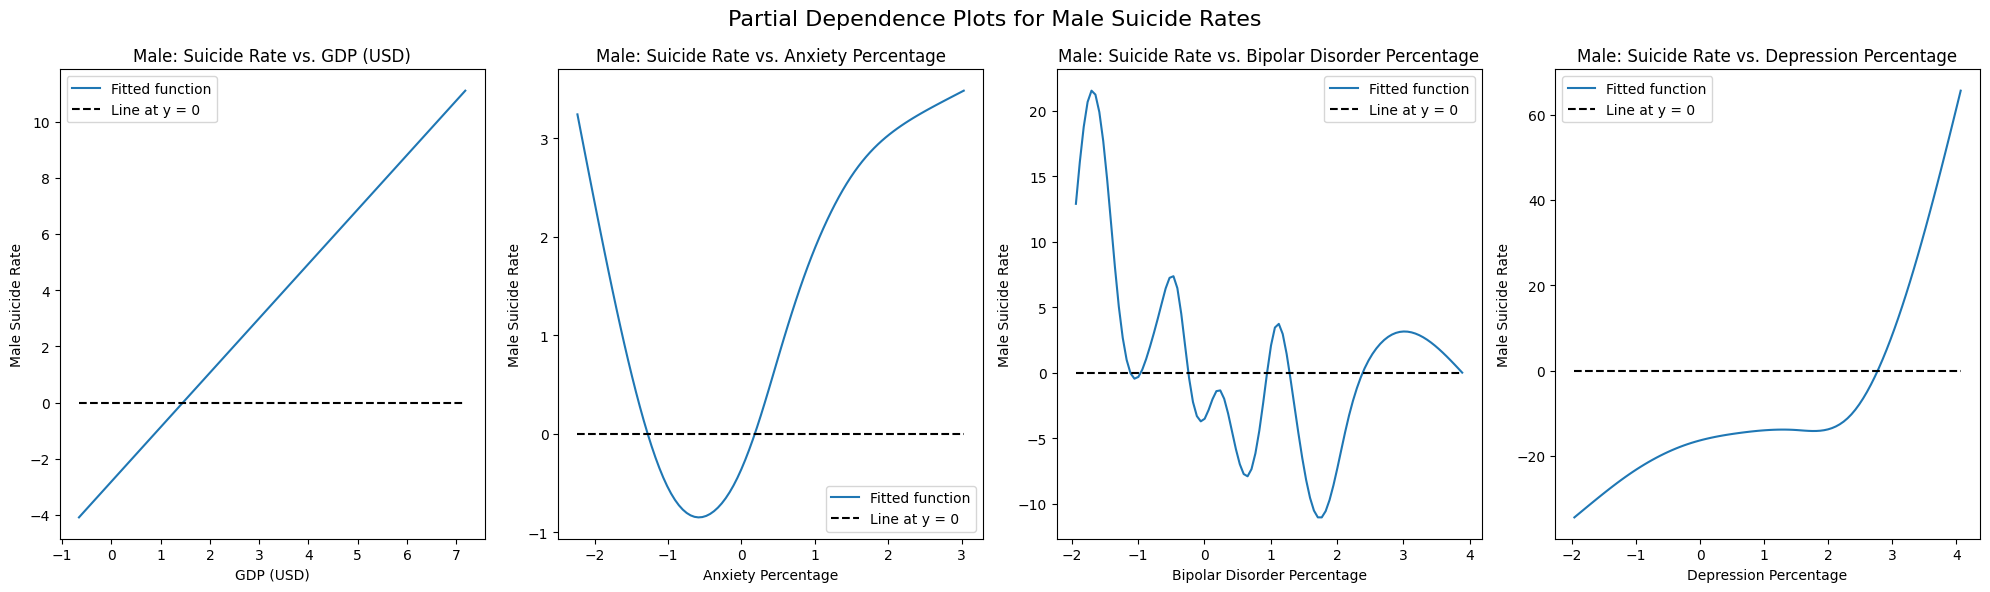

In [176]:
plt.figure();
fig, axs = plt.subplots(1,4);
fig.set_size_inches(20, 6);
fig.set_tight_layout(tight=True,)
fig.suptitle("Partial Dependence Plots for Male Suicide Rates", fontsize=16)

cols = list(X_train_male_scaled.columns)
titles = ["GDP (USD)", "Anxiety Percentage", "Bipolar Disorder Percentage", "Depression Percentage"]

for i, ax in enumerate(axs):
    XX = male_gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], male_gam.partial_dependence(term=i, X=XX), label="Fitted function", linewidth=1.5)
    ax.hlines(y=0, xmin=min(X_train_male_scaled[cols[i]]), xmax=max(X_train_male_scaled[cols[i]]), colors="black", linestyles='--', label="Line at y = 0")
    ax.legend()
    ax.set_title(f"Male: Suicide Rate vs. {titles[i]}");
    ax.set_xlabel(titles[i])
    ax.set_ylabel("Male Suicide Rate")

### Female dataset

#### Fitting and tuning

We will follow the same process of fitting and tuning for the female dataset:

In [54]:
female_gam = LinearGAM(s(feature=0) + s(feature=1) + s(feature=2) + s(feature=3)).fit(X_train_female_scaled, Y_train_female)
female_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.2766
Link Function:                     IdentityLink Log Likelihood:                                  -468.3539
Number of Samples:                          144 AIC:                                              995.2611
                                                AICc:                                            1010.8498
                                                GCV:                                               15.1388
                                                Scale:                                              9.9041
                                                Pseudo R-Squared:                                   0.6118
Feature Function                  Lam

C:\Users\david\AppData\Local\Temp\ipykernel_17816\1727835413.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  female_gam.summary()


In [55]:
female_gam.lam # lams/smoothing strengths 

[[0.6], [0.6], [0.6], [0.6]]

In [56]:
female_gam.n_splines # number of splines

[20, 20, 20, 20]

In [59]:
# Perform grid search to find the best lam and n_splines

lam = np.logspace(-3, 5, 4)       # For each lam, try 4 possible values, log-spaced
n_spline = np.array([10, 20, 30]) # Try 10, 20, or 20 splines
lams = [lam] * 4           # Replicate these values for all 4 lams by making a list of arrays, one for each term
n_splines = [n_spline] * 4 # Do the same for splines

# Perform grid search and change the male_gam variable to the best model found
female_gam.gridsearch(X = X_train_female_scaled, y = Y_train_female, lam=lams, n_splines = n_splines, objective='GCV')

  0% (0 of 20736) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (4 of 20736) |                      | Elapsed Time: 0:00:00 ETA:   0:10:00
  0% (7 of 20736) |                      | Elapsed Time: 0:00:00 ETA:   0:11:47
  0% (9 of 20736) |                      | Elapsed Time: 0:00:00 ETA:   0:15:46
  0% (12 of 20736) |                     | Elapsed Time: 0:00:00 ETA:   0:15:50
  0% (14 of 20736) |                     | Elapsed Time: 0:00:00 ETA:   0:15:59
  0% (15 of 20736) |                     | Elapsed Time: 0:00:00 ETA:   0:18:18
  0% (17 of 20736) |                     | Elapsed Time: 0:00:00 ETA:   0:19:59
  0% (18 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:21:33
  0% (21 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:21:43
  0% (23 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:22:51
  0% (24 of 20736) |                     | Elapsed Time: 0:00:01 ETA:   0:24:03
  0% (25 of 20736) |                    

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [143]:
female_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                        8.08
Link Function:                     IdentityLink Log Likelihood:                                  -481.9501
Number of Samples:                          144 AIC:                                              982.0602
                                                AICc:                                             983.4271
                                                GCV:                                               12.0653
                                                Scale:                                             10.8531
                                                Pseudo R-Squared:                                   0.5004
Feature Function                  Lam

C:\Users\david\AppData\Local\Temp\ipykernel_17816\3412412235.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  female_gam.summary()


The significance stars and p-values tell us that GDP and the percentage of women with anxiety have no effect on female suicide rates. The percentage of women with bipolar disorder, and the percentage of women with depression, do have an effect.

Interestingly, GDP had an effect on male suicide rates, but not on female ones. 

The pseudo R^2 is about 0.5.

In [65]:
female_gam.lam

[[100000.0], [100000.0], [215.44346900318823], [215.44346900318823]]

In [66]:
female_gam.n_splines

[10, 10, 20, 30]

For the GAM model predicting female suicide rates, the best `lam` values found are about 100000, 100000, 215.44, and 215.44, in the order of the features. The best `n_splines` values found are 10, 10, 20, and 30 splines, in the order of the features.

#### Training and test errors

In [62]:
from sklearn.metrics import root_mean_squared_error

Y_train_pred_female = female_gam.predict(X_train_female_scaled) # The predicted y-values (suicide rates) for the training set
train_rmse_female = root_mean_squared_error(y_true = Y_train_female, y_pred = Y_train_pred_female) # Get the training RMSE
train_rmse_female

3.2006467466640216

In [63]:
Y_test_pred_female = female_gam.predict(X_test_female_scaled) # predicted y-values for the test set
test_rmse_female = root_mean_squared_error(y_true = Y_test_female, y_pred = Y_test_pred_female) # test RMSE
test_rmse_female

2.409140511095347

#### Partial dependence plots

This is the same code taken from [this source](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html). 

<Figure size 640x480 with 0 Axes>

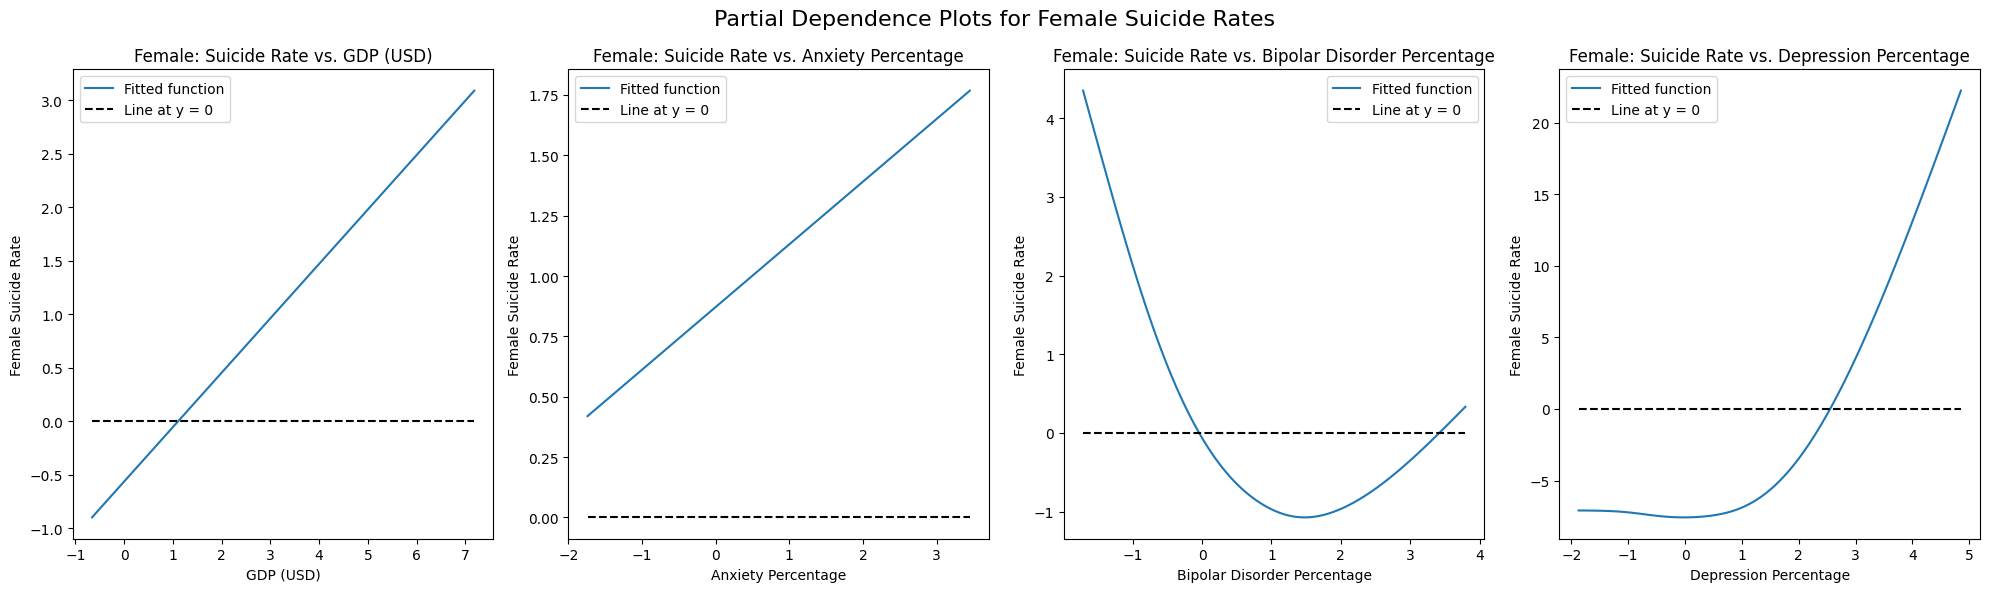

In [177]:
plt.figure();
fig, axs = plt.subplots(1,4);
fig.set_size_inches(20, 6)
fig.set_tight_layout(tight=True)
fig.suptitle("Partial Dependence Plots for Female Suicide Rates", fontsize=16)

cols = list(X_train_female_scaled.columns)
titles = ["GDP (USD)", "Anxiety Percentage", "Bipolar Disorder Percentage", "Depression Percentage"]


for i, ax in enumerate(axs):
    XX = female_gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], female_gam.partial_dependence(term=i, X=XX), label="Fitted function", linewidth=1.5)
    ax.hlines(y=0, xmin=min(X_train_female_scaled[cols[i]]), xmax=max(X_train_female_scaled[cols[i]]), colors="black", linestyles='--', label="Line at y = 0")
    ax.legend()

    ax.set_title(f"Female: Suicide Rate vs. {titles[i]}");
    ax.set_xlabel(titles[i])
    ax.set_ylabel("Female Suicide Rate")